In [ ]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [ ]:
#Set Constants Here
dt = 0.01

#Model Parameters
gK0 = 0.36
gL0 = 0.003
gNa0 = 1.2

VK = -77
VNa = 50
VL = 54.387
Cm = 0.010

#Initial Values
V0 =-64.9964
m0 = 0.0530
h0 = 0.5960
n0 = 0.3177


spike_threshold = -40

In [ ]:
def alphaM(V):
    return (0.1*(V+40)) / (1  - np.exp(-0.1*(V+40)))

def betaM(V):
    return 4*np.exp(-0.0556*(V+65))

def alphaH(V):
    return 0.07*np.exp(-0.05*(V+65))

def betaH(V):
    return 1/(np.exp(-0.1*(V+35)))

def alphaN(V):
    return (0.01*(V+55)) / (1 - np.exp(-0.1*(V+55)))

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

In [ ]:
def SimulateHHNeuron(I, T0):
  #Make empty arrays for the simulations
  T = int(T0/dt)
  t = np.arange(0,T)*dt
  V = np.zeros(T)
  m = np.zeros(T)
  h = np.zeros(T)
  n = np.zeros(T)

  rec_spikes = []

  V[0] = V0
  m[0] = m0
  h[0] = h0
  n[0] = n0
  
  for i in range(0,T-1):
    V[i+1] = V[i] + dt*(I(t[i]) - (gNa0*m[i]**3*h[i]*(V[i]-VNa) + gK0*n[i]**4*(V[i]-VK) + gL0*(V[i]-VL)))/Cm
    m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i])
    h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i])
    n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i])
    if V[i+1] >= spike_threshold and V[i] < spike_threshold:
      rec_spikes.append(i*dt)
  return V,m,h,n,t, rec_spikes

[]


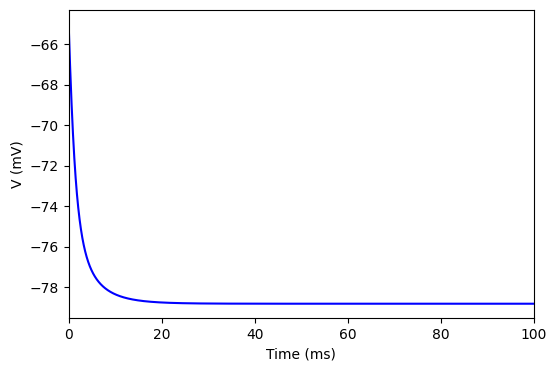

In [ ]:
def I(t):
  return -0.4

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)

print(spikes)

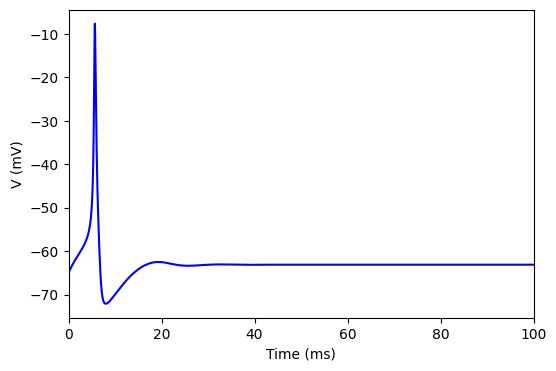

In [ ]:
def I(t):
  return -0.3
  
V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("currentHHminus0.3.pdf")



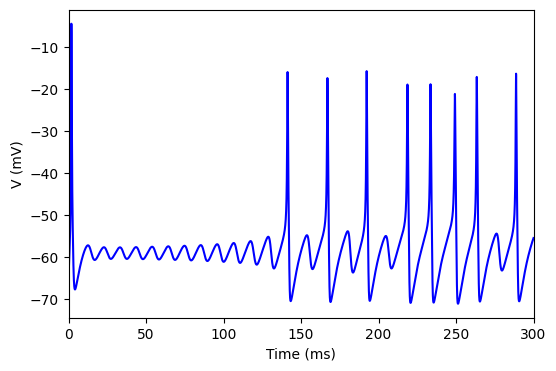

In [ ]:
def I(t):
  return -0.21

V,m,h,n,t, spikes = SimulateHHNeuron(I,1000)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,300)
plt.savefig("currentHHminus0.21.pdf")



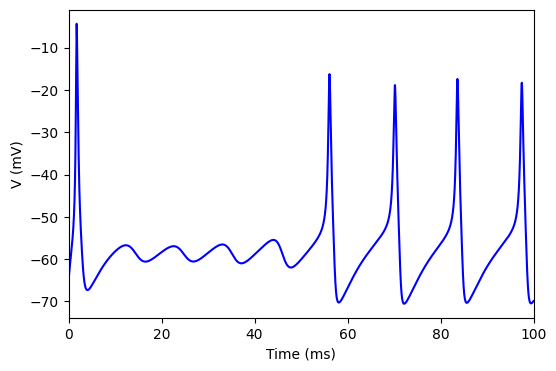

In [ ]:
def I(t):
  return -0.2

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)
plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("currentHHminus0.2.pdf")



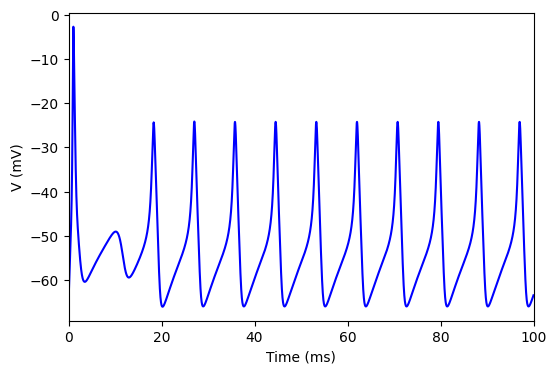

In [ ]:
def I(t):
  return 0.01

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("currentHH0.01.pdf")


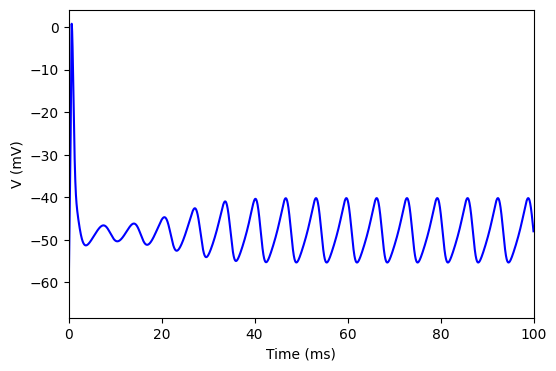

In [ ]:
def I(t):
  return 0.5

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)

plt.savefig("currentHH0.5.pdf")


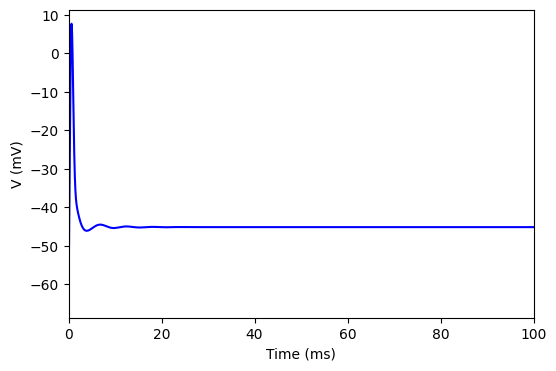

In [ ]:
def I(t):
  return 1

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("currentHH1.pdf")


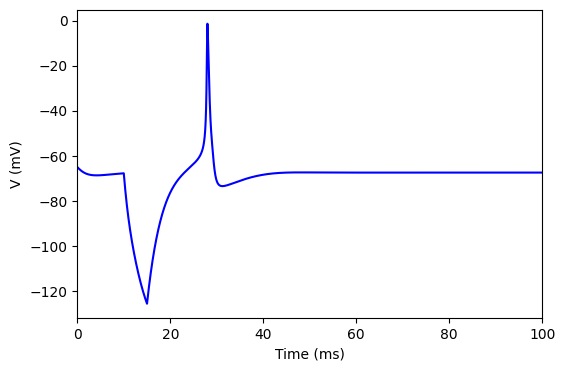

In [ ]:
#Post Inhibitory Rebound
def I(t):
  if t < 10:
    return -0.35
  elif t < 15:
    return -0.6
  else:
    return -0.35

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)

plt.savefig("HHPostInhibitoryRebound.pdf")


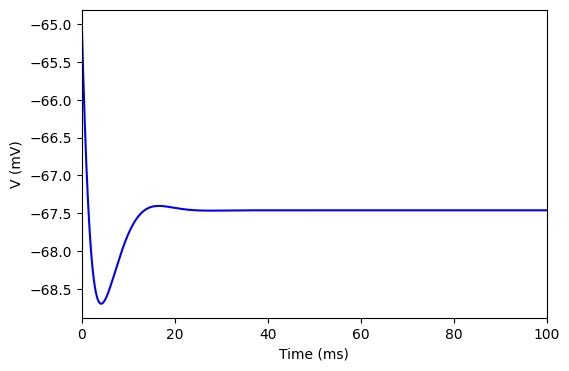

In [ ]:
def I(t):
  return -0.35

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("currentHHminus0.35.pdf")



In [ ]:
avg_rate = []
std = 0
I0 = 0.01
np.random.seed()


def I(t): #noisy current
  return I0 + std * np.random.randn()


Iarray = np.linspace(-0.4,1,100)
for current in Iarray:
  I0 = current
  V,m,h,n,t, spikes = SimulateHHNeuron(I,500)
  avg_rate.append(len(spikes))


plt.plot(Iarray, avg_rate)
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Spike Count');
plt.xlim(-0.4,1)
plt.ylim(0,)
plt.savefig("HHFIcurve.pdf")


KeyboardInterrupt: ignored

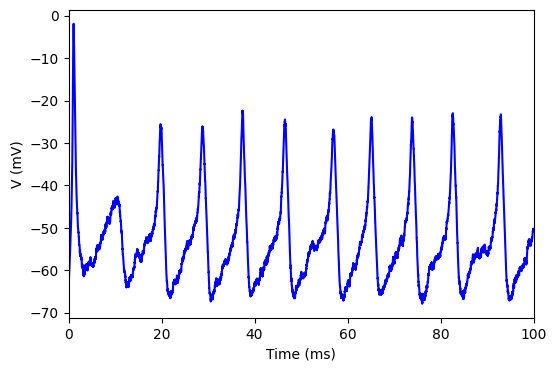

In [ ]:
std = 0.2
I0 = 0.01


def I(t): #noisy current
  np.random.seed()
  return I0 + std * np.random.randn()

V,m,h,n,t, spikes = SimulateHHNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("noisyHH0.01.pdf")

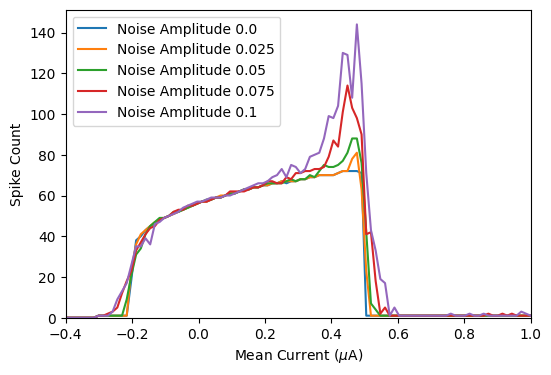

In [ ]:
I0 = 0
std = 0
np.random.seed()


def I(t): #noisy current
  return I0 + std * np.random.randn()

Iarray = np.linspace(-0.4,1,100)
stdarray = np.linspace(0,0.1,5)
for sig in stdarray:
  avg_rate = []
  for current in Iarray:
    I0 = current
    std = sig
    V,m,h,n,t, spikes = SimulateHHNeuron(I,500)
    avg_rate.append(len(spikes))
  plt.plot(Iarray, avg_rate, label = 'Noise Amplitude ' + str(round(std, 3)))
  plt.xlim(-0.4,1)
  
plt.ylim(0,)
plt.xlabel('Mean Current ($\mu$A)')
plt.ylabel('Spike Count')
plt.legend()
plt.savefig("HHFIcurvewithnoise.pdf")